<a href="https://colab.research.google.com/github/virtualspark/YCNG232-NLP_Fundamentals/blob/main/Reflexion_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gutenbergpy # https://github.com/raduangelescu/gutenbergpy to get access to full texts of books

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
target = 47360 # Title: Le second rang du collier, by Judith Gautier
import gutenbergpy.textget
raw  = gutenbergpy.textget.get_text_by_id(target) # access the content
text = gutenbergpy.textget.strip_headers(raw) # remove header metadata
count = 100 # how many characters we wish to see
print(text[:count]) 
print(text[-count:])

b'http://www.freeliterature.org (Images generously made\navailable by The Bodleian Libraryin Oxford)\n\n\n'
b'R\xc3\x89GOIRE XVI (1831-1846) qui faisait ses d\xc3\xa9lices de Paul de Kock, dont\nil italianisait le nom.\n\n\n\n\n'


In [3]:
s = text.decode("utf-8") # get a string from the byte sequence
marker = '1909'
startPosition = s.index(marker) + len(marker)
content = s[startPosition:]
print(content[:count]) # beginning
print(content[-count:]) # end






I


--Je suis sûr, Théo, que mam'zelle Huai, enseigne à vos filles le plus
pur accent marseilla

GRÉGOIRE XVI (1831-1846) qui faisait ses délices de Paul de Kock, dont
il italianisait le nom.







In [4]:
# Step 1: Count estimate of number of sentences

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
number_of_sentences = sent_tokenize(content)
print(len(number_of_sentences))

3179


In [7]:
# Step 2: Count estimate of number of paragraphs

In [8]:
lines = content.strip().splitlines() # to remove empty lines at the beginning and end   
emptylines = [e for e in lines if e.strip() == ''] # find empty lines (line between paragraph and another)
len(emptylines)

1685

In [9]:
# Step 3: Remove punctuations

In [10]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
words = tokenizer.tokenize(content)
words_join_no_punctuations = ' '.join(words)
# print(words_join_no_punctuations)

In [11]:
# Step 4: Find all words in the book while removing stopwords

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
skip = stopwords.words('french')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from nltk import sent_tokenize, word_tokenize

In [14]:
words = word_tokenize(words_join_no_punctuations)
wordsFiltered = []

for w in words:
    if w not in skip and len(w) > 3:
        wordsFiltered.append(w)

words_join_no_stopwords = ' '.join(wordsFiltered)
# print(words_join_no_stopwords)

In [15]:
# Step 5: Number of names in the text

In [16]:
words_names = word_tokenize(words_join_no_stopwords)
possible_names = [word for word in words_names[1:] if word[0].isupper() and len(word) > 3]
# print(possible_names)
print(len(possible_names))

3518


In [17]:
# Step 6: Find and append all stopwords in the book

In [18]:
from collections import Counter

In [19]:
words = word_tokenize(words_join_no_punctuations)
stopwordsFiltered = []

for w in words:
    if w in skip:
        stopwordsFiltered.append(w)

words_join_stopwords = ' '.join(stopwordsFiltered)
# print(words_join_stopwords)

In [20]:
# Step 7: Count the number of stopwords in the book

In [21]:
NUM_WORDS = 10

word_counts = Counter(word for word in stopwordsFiltered)
print(f'\nThe {NUM_WORDS} most frequent stopwords are:\n')
for i, (word, count) in enumerate(word_counts.most_common(NUM_WORDS)):
    print('%2s. %4s %s' % (i, count, word))


The 10 most frequent stopwords are:

 0. 3193 de
 1. 2101 et
 2. 1763 la
 3. 1509 le
 4. 1404 à
 5. 1240 l
 6. 1118 un
 7. 1079 d
 8. 1067 il
 9. 1010 les


In [22]:
# Step 8: Count the number of words in the book which are not stopwords

In [23]:
NUM_WORDS = 10

word_counts = Counter(word for word in wordsFiltered)
print(f'\nThe {NUM_WORDS} most frequent words are:\n')
for i, (word, count) in enumerate(word_counts.most_common(NUM_WORDS)):
    print('%2s. %4s %s' % (i, count, word))


The 10 most frequent words are:

 0.  395 plus
 1.  294 tout
 2.  286 très
 3.  279 père
 4.  226 bien
 5.  217 comme
 6.  203 sans
 7.  185 cette
 8.  161 être
 9.  139 faire


In [24]:
# Step 9: Build a histogram of the top 10 frequent words in the book

In [25]:
import pandas as pd

In [26]:
most_common_words = word_counts.most_common(NUM_WORDS)
print(most_common_words)

[('plus', 395), ('tout', 294), ('très', 286), ('père', 279), ('bien', 226), ('comme', 217), ('sans', 203), ('cette', 185), ('être', 161), ('faire', 139)]


In [27]:
word_frequency = Counter(" ".join(wordsFiltered).split()).most_common(NUM_WORDS)

In [28]:
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

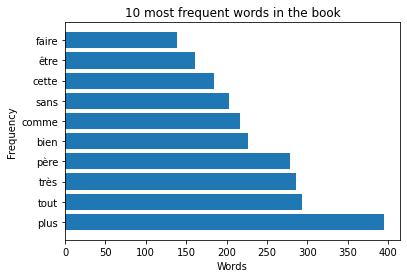

In [29]:
import matplotlib.pyplot as plt
plt.barh(words, counts)
plt.title("10 most frequent words in the book")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

In [30]:
# Step 10: Plot a wordcloud of the words filtered without stopwords

In [31]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# print(wordsFiltered)
# print(words_join_no_stopwords)

Plotting of the words filtered without stopwords


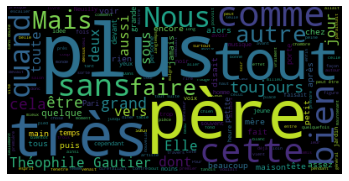

In [33]:
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

print(f'Plotting of the words filtered without stopwords')
draw = ' '.join([ w for w in wordsFiltered ])
cloud = WordCloud().generate(draw)
plt.imshow(cloud)
plt.axis('off')
plt.show()